In [1]:
import numpy as np                      
import pandas as pd                     
import os                               
import cv2      
import tensorflow
import matplotlib.pyplot as plt         
from tqdm.notebook import tqdm          
from sklearn.utils import shuffle       

from tensorflow.keras.models import load_model
from tensorflow.keras import applications           
from tensorflow.keras import optimizers            
from tensorflow.keras.utils import to_categorical   
from tensorflow.keras.models import Sequential, Model, load_model 
from tensorflow.keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
foldernames = os.listdir('./training-data')
categories = []
files = []
i = 0
for k, folder in enumerate(foldernames):
    filenames = os.listdir("./training-data/" + folder);
    for file in filenames:
        files.append("./training-data/" + folder + "/" + file)
        categories.append(k)
        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})
train_df = pd.DataFrame(columns=['filename', 'category'])
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

train_df.head()
train_df = train_df.reset_index(drop=True)
train_df

,filename,category
0,./training-data/spider/OIP-4Xc2xJTCLn4FSQmQ08M...,0
1,./training-data/spider/OIP-726qaS3uHC3IGduUTTV...,0
2,./training-data/spider/OIP-04fhoeLUsHSQ7MackFT...,0
3,./training-data/spider/OIP-FXgDq6uJO8Bt5wP11db...,0
4,./training-data/spider/OIP-2YRyN4GnEn_8Efun_3z...,0
...,...,...
4995,./training-data/horse/OIP-oap9gpcs2975WMby8jvL...,9
4996,./training-data/horse/OIP-LaMTHLyJxpIBseRgD_ne...,9
4997,./training-data/horse/OIP-jdO7QaRkH8dUnVXGC3Dt...,9
4998,./training-data/horse/OIP-3bZ04VOtOB0Wr_XGJsG7...,9


In [3]:
y = train_df['category']
x = train_df['filename']
y = train_df['category']

x, y = shuffle(x, y, random_state=8) 

In [5]:
def centering_image(img):
    size = [256,256]
    
    img_size = img.shape[:2]
    
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized

images = []
with tqdm(total=len(train_df)) as pbar:
    for i, file_path in enumerate(train_df.filename.values):
        img = cv2.imread(file_path)
        print(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        img = centering_image(cv2.resize(img, dsize=tile_size))

        img = img[16:240, 16:240]
        images.append(img)
        pbar.update(1)

images = np.array(images)

./training-data/spider/OIP-4Xc2xJTCLn4FSQmQ08M7NAHaFa.jpeg
./training-data/spider/OIP-726qaS3uHC3IGduUTTVy_QHaFj.jpeg
./training-data/spider/OIP-04fhoeLUsHSQ7MackFTF_AHaHa.jpeg
./training-data/spider/OIP-FXgDq6uJO8Bt5wP11db47gHaFD.jpeg
./training-data/spider/OIP-2YRyN4GnEn_8Efun_3zfygHaHa.jpeg
./training-data/spider/OIP-NKJXhMo0G_pLhekfFVzX3QHaEn.jpeg
./training-data/spider/OIP-W_7-EaeajgofC-7oOwhSnwEMEs.jpeg
./training-data/spider/OIP-aI0GVerH2CONbgLEn_c1RQHaFS.jpeg
./training-data/spider/OIP-XqA4D3bfoeGFjG54UBsCMwHaEK.jpeg
./training-data/spider/OIP-fDtauUI9EoRxoR3xuAfw0AHaGP.jpeg
./training-data/spider/OIP-u7-KgvBFflFZvXSbmtGtsAEMDo.jpeg
./training-data/spider/OIP-DX4dztiGvYIbEeknoXlt_gHaHa.jpeg
./training-data/spider/OIP-bT5FOljgLy6vbTSZ5j38_QHaFj.jpeg
./training-data/spider/OIP-_no9YX5VYCocYJjQvShDbAHaGH.jpeg
./training-data/spider/OIP-f8rJQtxoP5RdG-dsrknuVgHaF9.jpeg
./training-data/spider/OIP-96TZ-FTXb8_40RuYTYhmkAHaFt.jpeg
./training-data/spider/OIP-Xrd-4i5V0C_tUUfyTzcLDgHaE8.jp

./training-data/spider/eb33b7092af2003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/OIP-ynBaRLCcIBEDsdCnnYCxjgHaE7.jpeg
./training-data/spider/OIP-z7glKET-e-ks3f1EIDFfFAHaE7.jpeg
./training-data/spider/OIP-RJQfavMQKWokWMGTnxLmBAHaE8.jpeg
./training-data/spider/OIP-ygbe4i0-1ewbEAI8aiV6kQHaE4.jpeg
./training-data/spider/OIP-crNX8503-QXvpGeGJjpopQHaFj.jpeg
./training-data/spider/OIP-Vo7oj39_hrp5z8N7NWxwYgAAAA.jpeg
./training-data/spider/OIP-SPx0POO4f51gfLh44TcGJwHaE8.jpeg
./training-data/spider/OIP-YQXaeXxaHofNUT_VI4ZyXgHaDB.jpeg
./training-data/spider/OIP-Xp9H58fGNbmq3FJ0IeW3rgHaGi.jpeg
./training-data/spider/OIP-g7GYJ_iQv4e1hEVrWfwLKwHaH4.jpeg
./training-data/spider/OIP-J19GpabhHSQlWsVN0gWxGQHaE7.jpeg
./training-data/spider/OIP-gcqTrIrAUmy6eyP7mCUqNgHaFp.jpeg
./training-data/spider/OIP-ZUnieU4McT-8jIM1p_Wy_QHaIl.jpeg
./training-data/spider/OIP-kTX3pC6rm5BczJ4o-HDhrgHaHa.jpeg
./training-data/spider/OIP-gCZwK-nLRxB5U0Ylqp46tAHaEo.jpeg
./training-data/spi

./training-data/spider/OIP-4v1DayFbeG7abHVhCL2W9QHaE7.jpeg
./training-data/spider/OIP-PqwbmQfvVwX7BGz4Iv3FBgAAAA.jpeg
./training-data/spider/OIP-IEGET7Pc5fkboBLTz6r7fwHaE8.jpeg
./training-data/spider/OIP-fIE16CvxaHeE7iw3hk7XzgHaF7.jpeg
./training-data/spider/OIP-1p4IuddkZuB5R0ZAfp2I_wHaKm.jpeg
./training-data/spider/OIP-0KrFxjWmN86M_XIKlWwg-QHaE8.jpeg
./training-data/spider/OIP-kH_MuXdOjUUG8x5hZCzUnQHaG1.jpeg
./training-data/spider/OIP-__HPppHyk7d0izZybMZ9bgAAAA.jpeg
./training-data/spider/OIP-RyBGZuOEeZNn6o8tbEwTVwHaFi.jpeg
./training-data/spider/OIP-pq-Dpyww0jITwDnHLD5w-QHaFx.jpeg
./training-data/spider/OIP-TcSE6XcbMCn07C50J_w6HQHaFj.jpeg
./training-data/spider/OIP-LK7d86__Q-rFlhlVdaPEHwHaHa.jpeg
./training-data/spider/OIP-vGzyOuclqPHrY9823vouqQHaE7.jpeg
./training-data/spider/OIP-4l6dVZt5TmH0ul5dFiQ6uQHaHc.jpeg
./training-data/spider/OIP-5zdfiVrAYf4q0kLc_eDgMQHaE8.jpeg
./training-data/spider/eb3cb70f28f0053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spi

./training-data/cow/OIP-7GwiRnqahuMDe5V6PcI47AAAAA.jpeg
./training-data/cow/OIP-llciAmnyqXhEEgL-Ln4vywHaFj.jpeg
./training-data/cow/OIP-cBM5tLvaQTs9d3sXonvpNgAAAA.jpeg
./training-data/cow/OIP-hjE-Xji-ePpKB4hIQvWoKAHaLH.jpeg
./training-data/cow/OIP-bzerovg-SDA_cjnllupUdgHaEK.jpeg
./training-data/cow/OIP-ftGK8InJzHieI1FkZScNMAHaFD.jpeg
./training-data/cow/OIP-MAV6g6N3Mz8cwz55AZiCIwHaFP.jpeg
./training-data/cow/OIP-F3hHqXLvJC2ZYfzAzY2NrQHaEn.jpeg
./training-data/cow/OIP-YnOIr3IRTCLio6NLOlXgdQHaFj.jpeg
./training-data/cow/OIP-2fPI2e-iTxcCXOlx5Ha94wHaE8.jpeg
./training-data/cow/OIP-5UcojjlEvlgTV7-A8g1CYwHaDt.jpeg
./training-data/cow/OIP-07UPZG9O1AAcXB0i9jhp_QHaFj.jpeg
./training-data/cow/OIP-AdJGFK-LwGPzjxYMoiFONQHaFj.jpeg
./training-data/cow/OIP-33DFPMwETYtM5jDb3mxOGAHaEE.jpeg
./training-data/cow/OIP-ZVfa-rayFxx76OpQRDzlkQHaDt.jpeg
./training-data/cow/OIP-IYqtKTLAmaymcOl7dw7rKgHaE7.jpeg
./training-data/cow/OIP-V_5PNTq2ezvyyS23d99UAwHaGd.jpeg
./training-data/cow/OIP-y1HJrLZokPHjYG3f3UlKIQHa

./training-data/cow/OIP-h5tyNnunXV_KlhX-0yN1TAHaE5.jpeg
./training-data/cow/OIP-_oLlGR00GY3Jxjq6aHbKrwHaFb.jpeg
./training-data/cow/OIP-FnF1g-dKMFYcCvodienYRwHaFj.jpeg
./training-data/cow/OIP-xPibfaGYoyDsou2Abw7xBwHaEt.jpeg
./training-data/cow/OIP-f1R9xCcC4M_hYpc8L7MghAHaFj.jpeg
./training-data/cow/OIP-zKvHiNsp2VW3qDWiCV3sCQHaFj.jpeg
./training-data/cow/OIP-VEQuzeSsITBqmUNtoe5X7wHaE8.jpeg
./training-data/cow/OIP-AUBG_CJ44mNij5za-0E_3wHaE8.jpeg
./training-data/cow/OIP-0ldBTWg_nbEWBFlj0QivFAAAAA.jpeg
./training-data/cow/OIP-6Gv_yZakhAl6OnbxX8PCxwHaFG.jpeg
./training-data/cow/OIP-Tb6pPRwBY4AWLvWhtWCGfQAAAA.jpeg
./training-data/cow/OIP-fbg6olyclASFKumUwW-bmwHaEs.jpeg
./training-data/cow/OIP-S4hoJJgDZb3wJxzQ7S76oQHaEv.jpeg
./training-data/cow/OIP-xU5iTRam7D07-mqwARZWRwHaFj.jpeg
./training-data/cow/OIP-ydOEHQBFSFfDLI6QkgLyygHaHa.jpeg
./training-data/cow/OIP-gn0PKw3rZiYzt5FPXPOAkQHaFl.jpeg
./training-data/cow/OIP-G1qWVIVan65I8ww68UtW7AHaGI.jpeg
./training-data/cow/OIP-CjT5We--TqAmuh5HBoQNmQHa

./training-data/dog/OIP-4hL_G2d5j_oGLWJ-wxlRxAHaLJ.jpeg
./training-data/dog/OIP-OVxXkoFSlMOq5u3iAxhIlwHaE7.jpeg
./training-data/dog/OIP-L0zqa21CS3rrg_xwkhSQWQHaFj.jpeg
./training-data/dog/OIP-VG62Ak_GHs3mgdLacsY_HgHaFc.jpeg
./training-data/dog/OIP-poLDoN04EWZDDpEsPLpq6AHaJ4.jpeg
./training-data/dog/OIP--DQsiH-9LglDNlEvJpZQZQHaFw.jpeg
./training-data/dog/OIP-I5gLe412sC2G0cm9OY_rMAHaE8.jpeg
./training-data/dog/OIP-WOFjwYfvm24noTcWz4SiZQHaHT.jpeg
./training-data/dog/OIP-v1zoAzA3_DkE1PnoaSznngAAAA.jpeg
./training-data/dog/OIP-20ZN0NVCG17s4Jl-znGDGAHaLH.jpeg
./training-data/dog/OIP-AMeAJLuwum4i-4aI1ED5AgHaE7.jpeg
./training-data/dog/OIP-fgRIwJ8NtddztqKQDPLalQAAAA.jpeg
./training-data/dog/OIP-aN-t7RoPcM-2tzF9L7JkpwHaFi.jpeg
./training-data/dog/OIP-CSKUhPKyWJk24mCG1pz-tgAAAA.jpeg
./training-data/dog/OIP-kPMz6LsjexuTo52-VtKEPAEsEs.jpeg
./training-data/dog/OIP-w9_sTNEwp6FSTYtUvm0w-AHaJ6.jpeg
./training-data/dog/OIP-0GhaPMWsyP-8rHQIiZwBOQHaJn.jpeg
./training-data/dog/OIP-W5iNnfrjrKYQyqhpQiTScwHa

./training-data/dog/OIP-9pE3z5tKVDTpSLgpXF0qMgHaFn.jpeg
./training-data/dog/OIP-tfGV1fucNYVTSSq1pyjJPgHaEK.jpeg
./training-data/dog/OIP-E0GDZaoMyDMnwdxCxf_tmwHaFj.jpeg
./training-data/dog/OIP-MQtdwHDxvZPjz3g_duez_AHaFj.jpeg
./training-data/dog/OIP-QuFZS3VqPtjdWbx2b0oSsgHaE9.jpeg
./training-data/dog/OIP-PBiQSTzv9pJYavEWjliXMwHaHa.jpeg
./training-data/dog/OIP-bHWySF9cMTil9ZSi7-fFKQHaFg.jpeg
./training-data/dog/OIP-a5-z8_oQu2MFTks7l2lpowHaFj.jpeg
./training-data/dog/OIP-JHrh9v--Z2nJaXBFTpi9DgHaGj.jpeg
./training-data/dog/OIP-7mf_-PhLWLRy9-LNseB4pwHaLH.jpeg
./training-data/dog/OIP-NWzvu13ABGHqUXUjz1NGswHaHa.jpeg
./training-data/dog/OIP-xMmQpPrtLyVG0ijnrWK4tgHaJ4.jpeg
./training-data/dog/OIP-ebegLCwh-ik6D6DufKGq-QHaL7.jpeg
./training-data/dog/OIP-QNlRpmSOIde_fMqJ5lAACAHaLZ.jpeg
./training-data/dog/OIP-LNf1JHIE-ZqOEEMEdc7EzgHaEX.jpeg
./training-data/dog/OIP-VSxwUzT6oEGcB5nvone7pQHaE8.jpeg
./training-data/dog/OIP-R9dBWLsTdMM9Ib1w06PgnwHaFj.jpeg
./training-data/dog/OIP--RzOJndNB4Agj6qql-XvGAHa

./training-data/dog/OIP-w1jzQ5eqlJzg87XpVyCoBAHaFj.jpeg
./training-data/dog/OIP-NTYIDppfg0oIfZgb2mWDngHaIC.jpeg
./training-data/dog/OIP-ZdOG7FaKX1_M9vzYKkRcCgHaFj.jpeg
./training-data/dog/OIP-8Wx2pd034J_7eU4WnL-nqwHaFj.jpeg
./training-data/dog/OIP-21b8qStyN5swsjUF2jHGlgHaJ4.jpeg
./training-data/dog/OIP-Y0O4gcL8TRLLlnfPkGTVOgHaMi.jpeg
./training-data/dog/OIP-oyzaR-fLTqZRhdBIA9EmUwHaG9.jpeg
./training-data/dog/OIP-MOE22wDzkm6s4l-NgA9pRgHaFj.jpeg
./training-data/dog/OIP-8QnItI38_TwZd7UAj2tj0gHaFb.jpeg
./training-data/dog/OIP-yKsdCMmOVq14HoO2lLE4IQHaEK.jpeg
./training-data/dog/OIP-Ia2sHwfdN1xxBzxIV1TLewHaE7.jpeg
./training-data/dog/OIP-8lgcY__IEwVybYkfnS0-EAHaFy.jpeg
./training-data/dog/OIP-1O9iuW5YCaoMBa97JR5FLwHaHd.jpeg
./training-data/dog/OIP-_wDkdGdRLM-PtyR0mPhV0QHaG2.jpeg
./training-data/dog/OIP-axwK4tfLfLrLvsvgMoz7WAAAAA.jpeg
./training-data/dog/OIP-lskN9LE2vNHf4p6SGQa1_QHaFj.jpeg
./training-data/dog/OIP-qe6i_5uWoRExSuwAxCDBZgHaJ0.jpeg
./training-data/dog/OIP-4oe01pHa9oy9ltFhms2M9QHa

./training-data/butterfly/ea37b00629f4033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/OIP--YxmjyUUbmVOTOwA5fv3XgHaFL.jpeg
./training-data/butterfly/OIP-NFHQJYe8iXv_Z0mhUqb72wHaHa.jpeg
./training-data/butterfly/ea36b40e2efc043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/OIP-kz8Nfk3HNNDHLKsFXslDuAHaJg.jpeg
./training-data/butterfly/OIP-ezC5pZvDSgpOiZi533zhpQHaF2.jpeg
./training-data/butterfly/OIP-_YJ6Leb7EKvGv_N_GDb2ugHaFi.jpeg
./training-data/butterfly/OIP-CzG69-nGQ5fGnCiKsULvpwHaFq.jpeg
./training-data/butterfly/eb35b30729f1043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
./training-data/butterfly/ea36b7072ff0033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-GUyLj74BOPWaJxskIAQ5yQHaFj.jpeg
./training-data/butterfly/OIP-XTwAGG6Uvr-hNyoDUjNOUwHaGz.jpeg
./training-data/butterfly/OIP-Bs5ATHAnhM42ZYHJTgy79QHaNJ.jpeg
./training-data/butterfly/OIP-6cpoMjN1R_lgziI9

./training-data/butterfly/OIP-64IToHXKu7DLlnr7tyjP8AHaHa.jpeg
./training-data/butterfly/OIP-sv0Fa6e8tfGEbdouczQq_gHaFg.jpeg
./training-data/butterfly/OIP-nLpkFQWXsiykHU6YpxsQtAHaEg.jpeg
./training-data/butterfly/OIP-HLBTy5JyuVN-cg2gEgzZBgHaH6.jpeg
./training-data/butterfly/ea36b60d2df7073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b00d29f4033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/OIP-HoYdfchE5lm-NL_D_VsfugHaHZ.jpeg
./training-data/butterfly/OIP-_LUzT5pHpRTtGY3PktMGswHaFG.jpeg
./training-data/butterfly/OIP-klam-nw1WfRI1d3PVby1XgHaFj.jpeg
./training-data/butterfly/OIP-Lsh4O_X6pwKN9VCq5y2TigHaJ4.jpeg
./training-data/butterfly/OIP-o7QqvyXzuW2no5ezY1zmFQHaDk.jpeg
./training-data/butterfly/OIP-_eNyV3DN2t677_34FjtCgQHaFj.jpeg
./training-data/butterfly/ea36b1072df6043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/OIP-ubdN4UeftAM0PYNCy8_SzQHaEo.jpeg
./training-data/butte

./training-data/butterfly/ea36b10b2df3043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea34b90b29fd073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/OIP-qU9_FZW4JQSX9O8OAq9rsgHaE7.jpeg
./training-data/butterfly/OIP-G8nHpKpnXuCwm5Qq4zUoeQHaE_.jpeg
./training-data/butterfly/OIP-W1lR4tVz8UN9fbRk_hVmjQHaE6.jpeg
./training-data/butterfly/OIP-Gmigp3Budjj6hXzD3BPsxQHaE6.jpeg
./training-data/butterfly/ec36b40a29e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/OIP-IR2mKpbGyauqqkxC1A53zwHaDK.jpeg
./training-data/butterfly/OIP-Z8_xxpuotauY24XqOos7zwHaEH.jpeg
./training-data/butterfly/OIP-HfRRsUNe1s3k6XgIaG6_vwHaE8.jpeg
./training-data/butterfly/OIP-uanzDIvNQNHOjLb7XFZzfAHaFx.jpeg
./training-data/butterfly/OIP-EQvYCqH2Yw2Xg9BhqwzHNwHaGS.jpeg
./training-data/butterfly/OIP-te0Na8q8erwMkFW3TWPz1gHaFj.jpeg
./training-data/butterfly/OIP-Xqh8UQdPkD_Strvlh6fpXwHaE7.jpeg
./training-data/butterfly

./training-data/butterfly/OIP-LOxENpLr0zBBlLt-kKyd6QHaFj.jpeg
./training-data/butterfly/ea36b50721fc033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-0SLZTSG08Ar-epysCY43xwHaGa.jpeg
./training-data/butterfly/ed3cb00e2ef21c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
./training-data/butterfly/ea36b60f2af4013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-UGyDlR6GXGPr9lr8_ERmOQHaJv.jpeg
./training-data/butterfly/OIP-7TUgLA5rq1SXUM3kxv7msQHaIy.jpeg
./training-data/butterfly/eb33b5062afd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
./training-data/butterfly/ea34b50a2ef3043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/OIP-tUJYdW-2PksRvFXHyaMElgDgEV.jpeg
./training-data/cat/eb3cb60e2cfc063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/1244.jpeg
./training-data/cat/1649.jpeg
./training-data/cat/211.jpeg
./training-data

./training-data/cat/1450.jpeg
./training-data/cat/601.jpeg
./training-data/cat/137.jpeg
./training-data/cat/702.jpeg
./training-data/cat/51.jpeg
./training-data/cat/ea36b10f29f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/508.jpeg
./training-data/cat/861.jpeg
./training-data/cat/659.jpeg
./training-data/cat/80.jpeg
./training-data/cat/1844.jpeg
./training-data/cat/1086.jpeg
./training-data/cat/91.jpeg
./training-data/cat/1203.jpeg
./training-data/cat/539.jpeg
./training-data/cat/1789.jpeg
./training-data/cat/913.jpeg
./training-data/cat/1679.jpeg
./training-data/cat/ea37b70f28f1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/487.jpeg
./training-data/cat/1759.jpeg
./training-data/cat/1491.jpeg
./training-data/cat/945.jpeg
./training-data/cat/936.jpeg
./training-data/cat/1426.jpeg
./training-data/cat/927.jpeg
./training-data/cat/1018.jpeg
./training-data/cat/279.jpeg
./training-data/cat/e134b50e2ef01c22d2524518b7444f92e

./training-data/cat/christian-wright-386668-unsplash.jpg
./training-data/cat/654.jpeg
./training-data/cat/ea34b90f2efd083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/450.jpeg
./training-data/cat/ea37b90b2bf0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/ea36b60b2af6093ed1584d05fb1d4e9fe777ead218ac104497f5c979aee4b1bf_640.jpg
./training-data/cat/147.jpeg
./training-data/cat/ea36b30729f3093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
./training-data/cat/1251.jpeg
./training-data/cat/815.jpeg
./training-data/cat/1367.jpeg
./training-data/cat/1223.jpeg
./training-data/cat/ea36b10f21f3083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
./training-data/cat/291.jpeg
./training-data/cat/1464.jpeg
./training-data/cat/189.jpeg
./training-data/cat/511.jpeg
./training-data/cat/498.jpeg
./training-data/cat/ea37b60a2ef4073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/1760.jpeg
./t

./training-data/elephant/ea35b80c28f3003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/OIP-qMfE5PZBv2uHNexFgbLQmgHaE8.jpeg
./training-data/elephant/eb3cb10e28f7073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/OIP-uo19HNQ7ktUQB0L-Hua5ygHaFj.jpeg
./training-data/elephant/eb3db30729fd013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/OIP-qjuXaEiINUoTbsIHe2rnrgHaED.jpeg
./training-data/elephant/OIP-qpgKvyeckAF4DQXef2QRfQAAAA.jpeg
./training-data/elephant/OIP-lLg_IuhbE0EJUvHLY-gUiwHaFj.jpeg
./training-data/elephant/e834b60f29f4093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/OIP-zdLC6J2HBU8m5uGhQNupOgAAAA.jpeg
./training-data/elephant/e83db40c28f7003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e834b00921f11c22d2524518b7444f92e37fe5d404b0144390f8c07aa5ecb6_640.jpg
./training-data/elephant/e131b0072ee90021d85a585

./training-data/elephant/eb3db1092ff0083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/ea36b0072bfc063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/eb33b50e29f4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/OIP-_i7gurmiBg4QLBR_GBC6jQHaF8.jpeg
./training-data/elephant/OIP-pZTeF1ca-j7NwecmK-cEAAHaEs.jpeg
./training-data/elephant/OIP-R5LdhT21tH0sFZva8qLIZAHaFj.jpeg
./training-data/elephant/OIP-4SJ3x5apyegneexd3692jAHaHa.jpeg
./training-data/elephant/OIP-e7HIa2D4YHigN3DhNtqeIgHaLW.jpeg
./training-data/elephant/OIP-Py6rPwuWKGAnWkEB7qkhuAHaFi.jpeg
./training-data/elephant/eb36b70d2efd073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.png
./training-data/elephant/OIP-LR9-EFz2NbPkMEtPjptQwAHaFj.jpeg
./training-data/elephant/OIP-hU1CHezTqt14mmy81TbFCgHaFc.jpeg
./training-data/elephant/OIP-t4ZQXGwFfaaQIW7xpdXd8QHaDw.jpeg
./training-data/elephant/OIP-AEVp0CIoz58mDzR2Id4nvQHaE8.jpe

./training-data/elephant/OIP-BaUZmkos4I1Lw2_akwV9BQHaFj.jpeg
./training-data/elephant/eb31b40d2ff7093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/e834b60f29f4073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/OIP-qafq-IKwWePApx4pDJ9JFgHaJC.jpeg
./training-data/elephant/OIP-RTNZFo6Otn_xDWUsDmb4WAHaFu.jpeg
./training-data/elephant/OIP-h0B78QJO-GFhQxlOMTOvVAHaEK.jpeg
./training-data/elephant/OIP-FaaDAHuVi2KVZVNVspAt8gHaE7.jpeg
./training-data/elephant/OIP-IBXQe08YV1fKHib_fNzFMAHaEK.jpeg
./training-data/elephant/eb36b6082ef3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/OIP-I3AosNj49p8uETef7j95zgHaHE.jpeg
./training-data/elephant/OIP-NEd2xhKxFC0j_-qjmfvXxQHaEK.jpeg
./training-data/elephant/OIP-LxaNLWRSmDXop72scoK_1QHaEo.jpeg
./training-data/elephant/OIP-ONo60yHYUmBZaU_TxmB3dQHaE8.jpeg
./training-data/elephant/OIP-nOxxXw4-1gSCPQ_VO3QPxAHaJl.jpeg
./training-data/elephant/ea36b90d2b

./training-data/chicken/OIP-R7DyUKQI9G1fQT9QfIRhTQHaHa.jpeg
./training-data/chicken/OIP-uXM1HPppDRdmKZX3EYdkygHaFj.jpeg
./training-data/chicken/OIP-SZYx2RrGYY72_SDyOI9wjQHaE-.jpeg
./training-data/chicken/OIP-tpuoJACe98NhTNbyTXLvCgHaLJ.jpeg
./training-data/chicken/895.jpeg
./training-data/chicken/102.jpeg
./training-data/chicken/OIP-qzLZhHBiXOj7kv237B-ZFgHaHa.jpeg
./training-data/chicken/OIP-TCIVYjX_mY6ogmwDB8kk5AHaFj.jpeg
./training-data/chicken/OIP-szv1hun2irUHZC9ySzAeOwHaFj.jpeg
./training-data/chicken/OIP-IPidKQRixdCiV61K3JmaQQHaEO.jpeg
./training-data/chicken/1017.jpeg
./training-data/chicken/OIP-ju4CROlyrKQUMfOWIRJYrQHaHa.jpeg
./training-data/chicken/1236.jpeg
./training-data/chicken/OIP-DSIvdNEGAP5h1H3nRShQ9QHaFj.jpeg
./training-data/chicken/OIP-Qu4jzRnfTOe-VdJhVYLxwgHaEK.jpeg
./training-data/chicken/OIP-9e92-_qJlNI8J8gPtcm4swHaFj.jpeg
./training-data/chicken/OIP-6zeUQ7xO-gH42XQlSheFMQHaGO.jpeg
./training-data/chicken/143.jpeg
./training-data/chicken/OIP-_yR039-4XwAnK2Tz14UJ5AHaL

./training-data/chicken/OIP-ZOqWEIeGmrl9G365ih4qpwHaHB.jpeg
./training-data/chicken/OIP-wTZIR3cSfoEXRorptX1oIwHaFj.jpeg
./training-data/chicken/867.jpeg
./training-data/chicken/OIP-b3qlFDCKxRN-v8tK5kz3WgHaGO.jpeg
./training-data/chicken/OIP-5muAueNfvBwEc6UfvzfrVQHaJZ.jpeg
./training-data/chicken/OIP-WKtZ1VQ7lqAp7YyYlMrAtQHaF7.jpeg
./training-data/chicken/913.jpeg
./training-data/chicken/OIP-5QQxtfk3m1yOqyilJY6p7gHaHm.jpeg
./training-data/chicken/OIP-4SENUGcJ2yYAhrK2lr2tEgHaE8.jpeg
./training-data/chicken/OIP-bRfOUzw-MeHZptWvGaw7mQHaFj.jpeg
./training-data/chicken/OIP-FMCP7DssP9exNL_KhVkQ_QHaFj.jpeg
./training-data/chicken/OIP-dDF1mtC9R9xm9NOYkrZafQHaE8.jpeg
./training-data/chicken/OIP-hPPeN91guI9ITb4zLBGDpgHaFj.jpeg
./training-data/chicken/OIP-UZX85ZKQBBrLcGtQldzzcQHaFh.jpeg
./training-data/chicken/487.jpeg
./training-data/chicken/OIP-IAm12wHTbd1lPmKIs_pGGgHaE8.jpeg
./training-data/chicken/OIP-e8IFGzsrlVtDf_QbKrRXAgHaFO.jpeg
./training-data/chicken/OIP-dk4iF6NuJF7hyhDoeYgMmAHaMW.jpeg
.

./training-data/sheep/OIP-1XWKWguZD1iC3tKWgj0tXwHaFj.jpeg
./training-data/sheep/OIP-2XJu1gPGJ_bPXpXwFAiBxAHaFB.jpeg
./training-data/sheep/OIP-VjqmgIFajbl-CBjKzytzhwHaFH.jpeg
./training-data/sheep/OIP-9ZHEsZUGufVdHA36zynrCQAAAA.jpeg
./training-data/sheep/OIP-LOUpuM6ap83Lmosb_cCVLgHaFj.jpeg
./training-data/sheep/eb30b30c2bf3003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb3cb00d20f3063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-L-gQMkZtpVg5mmV0LC5r-gAAAA.jpeg
./training-data/sheep/e83cb60c2df1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/OIP-tf9qQzQrv9ibF5zbsv723AHaGP.jpeg
./training-data/sheep/e13cb60a2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg
./training-data/sheep/eb32b10928fc073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/OIP-hhOCusMpVJGnrutfGViRDQHaE9.jpeg
./training-data/sheep/OIP-MIuT0udHQO0LsaNqNw2VRQHaEK.jpeg
./tra

./training-data/sheep/eb33b70a2cf5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-Su_es72u1TV4xWPDElOH6AHaFj.jpeg
./training-data/sheep/OIP-dtyxq2zgx5YUJwmGB99lNwHaFj.jpeg
./training-data/sheep/OIP-G0jIAqD_0Qb4_fcsIwtqdwHaFj.jpeg
./training-data/sheep/OIP-GQ6VC6CUmZWpgiafZ363KAHaFZ.jpeg
./training-data/sheep/eb37b50f2df0023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-twvz-dX3Junu5MpffuWj-QHaHa.jpeg
./training-data/sheep/OIP-kFiXdjx-f_pLDinYkkoIzwHaFj.jpeg
./training-data/sheep/OIP-iFZ7YI4ubGEMpxyCm-8pqgHaJ4.jpeg
./training-data/sheep/OIP-zt2Aynffn9ssam76JatisQHaE7.jpeg
./training-data/sheep/ea37b70c2af5043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/OIP-oRoEHRJafHVgndnlljcakQHaFj.jpeg
./training-data/sheep/OIP-aT7UFuTryWYgbZzFkRZfPQHaFj.jpeg
./training-data/sheep/OIP-KZWaH8GKzIZGW1_QBOpbogHaFj.jpeg
./training-data/sheep/ea36b20f29f1093ed1584d05fb1d4e9fe777ead218ac104497f5c97

./training-data/sheep/OIP--CqWh6W1NLb76TYL4OCGAAHaFi.jpeg
./training-data/sheep/OIP-sV0RBe-qFR24C1YHOI60CgHaFk.jpeg
./training-data/sheep/OIP-umQ6IEleSjltthuMWQR4hAHaEc.jpeg
./training-data/sheep/OIP-qVaDq7usGyKaNlGlWDMdOAHaKa.jpeg
./training-data/sheep/eb36b10e2df7053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP--8g1WpakEbcvQVK2QzzNgQHaEZ.jpeg
./training-data/sheep/e832b70c2bf3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-UujS86xRKYwzuLeqV4n6FwHaGm.jpeg
./training-data/sheep/OIP-pjS-T683IqfiBrO8l1f1AgHaF4.jpeg
./training-data/sheep/OIP-gkT7c6jBEq1_A3BJBKyAVgAAAA.jpeg
./training-data/sheep/OIP-bk4eP9iB3rQvF8-FgED6twHaE8.jpeg
./training-data/sheep/ea34b50629f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-qlArgSERZGyUf4H2rOYFCwHaFj.jpeg
./training-data/sheep/OIP-EkAjXyiRiQIFpn_adgzXDAHaEK.jpeg
./training-data/sheep/OIP-dC-c7CGFNFvMho6_OBl2lgHaFj.jpeg
./training-data/she

./training-data/squirrel/OIP-8eXjcKcrY2SOHdZXB2gOugHaE8.jpeg
./training-data/squirrel/OIP-mul9XWqFLnv5hlaYM-0l6QHaF7.jpeg
./training-data/squirrel/OIP-aTx20NuLabMpKcvXKKphgwHaEM.jpeg
./training-data/squirrel/OIP-nZ8o-j7gbZUK4q6m7UvGqgHaGK.jpeg
./training-data/squirrel/OIP-xSn8zdtlbh6CTVeNKLzh5wHaE7.jpeg
./training-data/squirrel/OIP-ikc8wHOzPfLCxLBFPEbCxQHaHa.jpeg
./training-data/squirrel/OIP-g7JziEBCUsiuhsJtaaxPVgAAAA.jpeg
./training-data/squirrel/OIP-m_5utNQ4aBPpCkum5Osu0gHaE8.jpeg
./training-data/squirrel/OIP-rxioFm2GgP2dbbTQgzptYAHaE8.jpeg
./training-data/squirrel/OIP-Lhl87K2IqQKSWrcRZUTF9gHaFj.jpeg
./training-data/squirrel/OIP-9huue4hZB6jy7zHW5UGt7gHaEK.jpeg
./training-data/squirrel/OIP-Rrc7X31l2Y4nxsOAnC_SUQHaFi.jpeg
./training-data/squirrel/OIP-h0EmWxqTRsM6N2qdsD8beAHaHa.jpeg
./training-data/squirrel/OIP-XA0ROOzLhxdVaeNRHRaS5AHaFW.jpeg
./training-data/squirrel/OIP-Mojm2cVH-daIteosGqCLGgAAAA.jpeg
./training-data/squirrel/OIP-BQGLjoJEvcqxSgwBNzEl7gHaLG.jpeg
./training-data/squirrel

./training-data/squirrel/OIP-WIZ4bKHSjJJvVlKlc32zlAAAAA.jpeg
./training-data/squirrel/OIP-D7Uc2G28U5ODHFw3IAZoKwHaFj.jpeg
./training-data/squirrel/OIP-Ea9INijzddwUrxoG75Qf1wAAAA.jpeg
./training-data/squirrel/OIP-PtvLdQTetrzcsorFbu--mgHaJ4.jpeg
./training-data/squirrel/OIP-qo1HqVJLeNkMohj8a29NhwAAAA.jpeg
./training-data/squirrel/OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg
./training-data/squirrel/OIP-2y4H6kyhqdqiCJt4gg-aFgHaEo.jpeg
./training-data/squirrel/OIP-QVZJH3uiHYv9Uya_bTKnoQHaE8.jpeg
./training-data/squirrel/OIP-QquJ-OPkcOOUUeBXxjoIJwHaJQ.jpeg
./training-data/squirrel/OIP-xziVYV8vGTFjF4CzDHuipwHaLH.jpeg
./training-data/squirrel/OIP-7EUCOLttlBanFMlqrCyidQHaCZ.jpeg
./training-data/squirrel/OIP-4XR1FYhMQbVEdaUWEj5ucAHaE7.jpeg
./training-data/squirrel/OIP-3aU6rBDvxixI8Hd6ympkEQHaFc.jpeg
./training-data/squirrel/OIP-V7I9pqDJh10yWq9DBF_T9AAAAA.jpeg
./training-data/squirrel/OIP-dX5zg3-_AX4FuqSovlF56AHaE8.jpeg
./training-data/squirrel/OIP-4aqvHKD33mWFWCpHL3VCwgHaFj.jpeg
./training-data/squirrel

./training-data/horse/OIP-IC30zNopNor-WnbrDJsqwgHaGO.jpeg
./training-data/horse/OIP-gvetZlsgpvI3mBrQnmOU-wHaFj.jpeg
./training-data/horse/OIP-hMYQuU5BbtqM6_dOB-Tp8gHaFj.jpeg
./training-data/horse/OIP-JUi52oJq6XWfrCR0KK9E_AAAAA.jpeg
./training-data/horse/OIP-C_HxLDCixO63413xvWwkegHaJQ.jpeg
./training-data/horse/OIP-73ZZvGxS11cK4APQzWyhKAHaFj.jpeg
./training-data/horse/OIP-av7HsoT_14l3cT_I2riMbAHaHa.jpeg
./training-data/horse/OIP-tEXdTAmr5XkLWgGrZXCbcwHaHy.jpeg
./training-data/horse/OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg
./training-data/horse/OIP-4zZxRi-SA6vMiPQG43PnwQHaGh.jpeg
./training-data/horse/OIP-PDccuIemSfo5ErsujM69gwHaE8.jpeg
./training-data/horse/OIP-t4icJ0DsyDvFyoWpS6GhVQHaLH.jpeg
./training-data/horse/OIP-fDE_DxL7pUTa-zHT4MLrrgHaG7.jpeg
./training-data/horse/OIP--Xf0qbc8IfvsFJWyF34-BgHaFm.jpeg
./training-data/horse/OIP-ekJA5TbhQZTMyM22fcbqfQHaFj.jpeg
./training-data/horse/OIP-MoUxuGO8IHDquvNKhOnULQDMEy.jpeg
./training-data/horse/OIP-fu7ZL247H3tdsjv7PcBGqAHaGw.jpeg
./training-dat

./training-data/horse/OIP-0eICwwtlBJ2hseiAoQWoJgHaLH.jpeg
./training-data/horse/OIP-IEZBdQCigCJqjV77Ci4DTwHaF7.jpeg
./training-data/horse/OIP-jkSSE271N6FKGewi4zpTzwHaF7.jpeg
./training-data/horse/OIP-wQN0WD9EbFw2pH_Q4OtSigHaFj.jpeg
./training-data/horse/OIP-FL55M1R8TBW365WQhAaSngHaLH.jpeg
./training-data/horse/OIP-L4ZmHRW8Fru6zJpITjMy5gHaGX.jpeg
./training-data/horse/OIP-qqNzZGXtM3epZu_XvxDq9gHaFj.jpeg
./training-data/horse/OIP-O5B1JhmVtQVPVzgx8Aa7WAHaFP.jpeg
./training-data/horse/OIP-zyTE-TTOww5cw3GQxP4mJgHaFR.jpeg
./training-data/horse/OIP-O4J1Ne58NEbX2ey9YK1y9QAAAA.jpeg
./training-data/horse/OIP-FfLuf_Rks38Izdmz7OgrjQHaFj.jpeg
./training-data/horse/OIP-2AMJ2_Ho2fQXIdlA-2ZMCAHaKi.jpeg
./training-data/horse/OIP-iW2JUzdAjsew5tna4wuJGgHaFj.jpeg
./training-data/horse/OIP-PHo0wQrnhhW5j0FbQk0jxwHaFj.jpeg
./training-data/horse/OIP-xvEI669gjtoNy6YEJDD5jQHaHa.jpeg
./training-data/horse/OIP-2qHtF81VRPZA8DCXhfzlVQHaFy.jpeg
./training-data/horse/OIP-TGjaTc59hJeXzZNW5HqGVQHaFU.jpeg
./training-dat

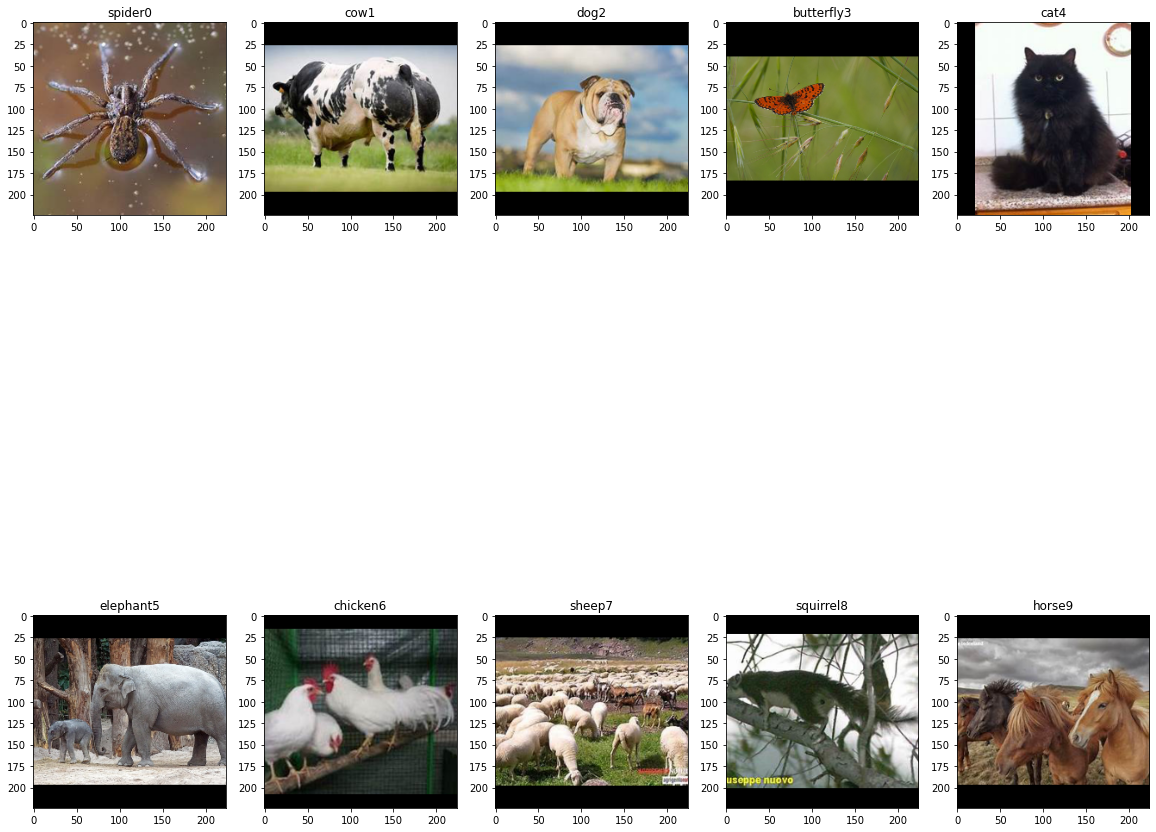

In [6]:
rows,cols = 2,5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,20))
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    
    axes[i//cols, i%cols].set_title(path[0].split('/')[-2] + str(path[1]))
    axes[i//cols, i%cols].imshow(images[train_df[train_df.filename == path[0]].index[0]])

In [7]:
data_num = len(y)
random_index = np.random.permutation(data_num)       
x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])
    
x = np.array(x_shuffle)                              
y = np.array(y_shuffle)                              
val_split_num = int(round(0.2*len(y)))               
x_train = x[val_split_num:]                          
y_train = y[val_split_num:]
x_test = x[:val_split_num] 
y_test = y[:val_split_num]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
y_train = to_categorical(y_train)                    
y_test = to_categorical(y_test)                      

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

img_rows, img_cols, img_channel = 224, 224, 3
name_animal = []
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    if path[0].split('/')[-2] == 'squirrel':
        name_animal.append('squirrel')
    elif path[0].split('/')[-2] == 'horse':
        name_animal.append('horse')
    elif path[0].split('/')[-2] == 'butterfly':
        name_animal.append('butterfly')
    elif path[0].split('/')[-2] == 'cow':
        name_animal.append('cow')
    elif path[0].split('/')[-2] == 'cat':
        name_animal.append('cat')
    elif path[0].split('/')[-2] == 'sheep':
        name_animal.append('sheep')
    elif path[0].split('/')[-2] == 'chicken':
        name_animal.append('chicken')
    elif path[0].split('/')[-2] == 'elephant':
        name_animal.append('elephant')
    elif path[0].split('/')[-2] == 'spider':
        name_animal.append('spider')
    elif path[0].split('/')[-2] == 'dog':
        name_animal.append('dog')

x_train (4000, 224, 224, 3)
y_train (4000,)
x_test (1000, 224, 224, 3)
y_test (1000,)


In [7]:

​
model.summary()
Model: "ani"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output), name='ani')
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


model.summary()

Model: "ani"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0       

In [8]:
batch_size = 32                       
epochs = 5                           

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)


history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('animal-recognition-checkpoint', monitor='val_acc')]
)

NameError: name 'model' is not defined

In [11]:
model.save('animal-recognition.h5')
del model

In [9]:
# load model
model = load_model('animal-recognition.h5')

In [10]:
# save for servnig
MODEL_DIR = './serve/'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

tensorflow.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./serve/1/assets


Epochs=5, Train accuracy=0.85674, Validation accuracy=0.90469


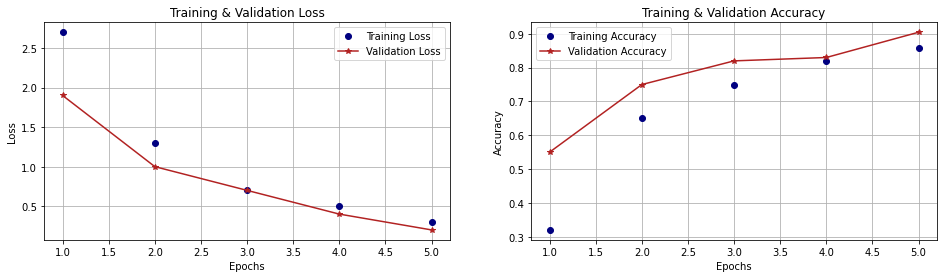

In [24]:
history = history.history

print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(epochs,history['acc'][epochs-1],history['val_acc'][epochs-1]))
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals
show_plots(history)

['spider', 'cow', 'dog', 'butterfly', 'cat', 'elephant', 'chicken', 'sheep', 'squirrel', 'horse']


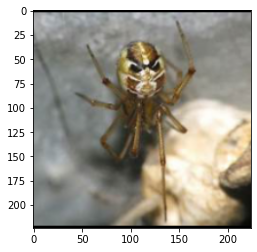

Actual  : spider
Predict : spider  with chance 100.00%


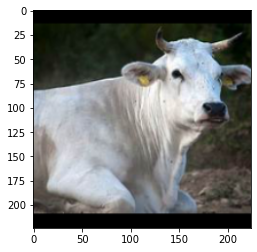

Actual  : cow
Predict : cat  with chance 99.82%


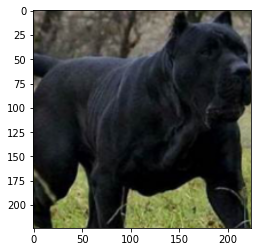

Actual  : dog
Predict : cow  with chance 100.00%


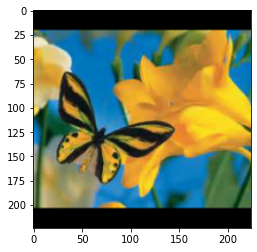

Actual  : butterfly
Predict : butterfly  with chance 100.00%


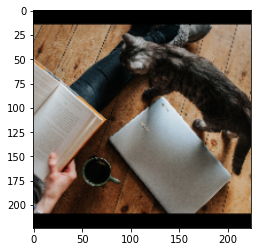

Actual  : cat
Predict : cat  with chance 16.14%
Predict : chicken  with chance 83.86%


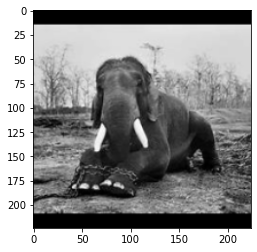

Actual  : elephant
Predict : elephant  with chance 100.00%


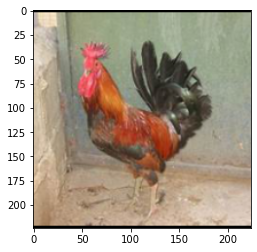

Actual  : chicken
Predict : chicken  with chance 100.00%


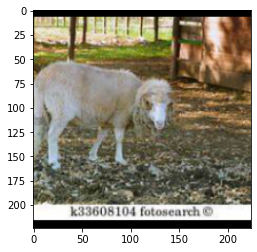

Actual  : sheep
Predict : dog  with chance 100.00%


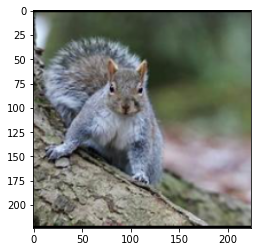

Actual  : squirrel
Predict : squirrel  with chance 100.00%


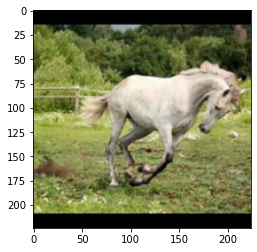

Actual  : horse
Predict : cow  with chance 100.00%


In [11]:
test_images = []


j = 12 
for i in range(10):
    path = train_df[train_df.category == i].values[j]
    a = images[train_df[train_df.filename == path[0]].index[0]]
    img = np.array(a)
    img = img[:, :, ::-1].copy() 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(img.shape[0] > img.shape[1]):
        tile_size = (int(img.shape[1]*256/img.shape[0]),256)
    else:
        tile_size = (256, int(img.shape[0]*256/img.shape[1]))
    img = centering_image(cv2.resize(img, dsize=tile_size))
    img = img[16:240, 16:240]
    test_images.append(img)

test_images = np.array(test_images).reshape(-1,224,224,3)
something = model.predict(np.array(test_images, dtype='f'))
animals = name_animal
print(animals);
i = 0
for pred in something:
    path = train_df[train_df.category == i].values[2]
    plt.imshow(test_images[i])
    plt.show()
    print('Actual  :', animals[i])
    for num in pred:
        if(num > 0.01):
            print('Predict :', animals[np.where(num == pred)[0][0]],' with chance {0:.2f}%'.format(num * 100))
    i += 1
